In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read Excel File
bc_df = pd.read_excel('./Dataset/trainDataset.xls')

In [3]:
bc_df.head()

,ID,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,1,144.0,41.0,0,0,0,1,3,3,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,TRG002178,0,142.0,39.0,1,1,0,0,3,3,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,TRG002204,1,135.0,31.0,0,0,0,1,2,1,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,TRG002206,0,12.0,35.0,0,0,0,1,3,3,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,TRG002210,0,109.0,61.0,1,0,0,0,2,1,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


### Exploratory Data Analysis

In [4]:
bc_df.describe

<bound method NDFrame.describe of             ID  pCR (outcome)  RelapseFreeSurvival (outcome)   Age  ER  PgR  \
0    TRG002174              1                     144.000000  41.0   0    0   
1    TRG002178              0                     142.000000  39.0   1    1   
2    TRG002204              1                     135.000000  31.0   0    0   
3    TRG002206              0                      12.000000  35.0   0    0   
4    TRG002210              0                     109.000000  61.0   1    0   
..         ...            ...                            ...   ...  ..  ...   
395  TRG002955              1                      49.250000  46.1   0    0   
396  TRG002958              0                      48.500000  53.3   0    0   
397  TRG002961              0                      47.500000  68.8   1    0   
398  TRG002962              0                      46.916667  46.0   1    0   
399  TRG002963              1                      46.750000  55.3   0    0   

     HER2  Trippl

In [5]:
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 120 entries, ID to original_ngtdm_Strength
dtypes: float64(108), int64(11), object(1)
memory usage: 375.1+ KB


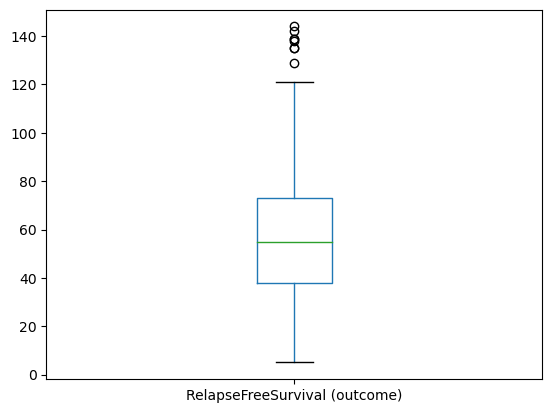

In [6]:
# Regression Target Outcome
bc_df['RelapseFreeSurvival (outcome)'].plot(kind='box')

In [7]:
# Classification Target Outcome
bc_df['pCR (outcome)'].value_counts()

0      299
1       96
999      5
Name: pCR (outcome), dtype: int64

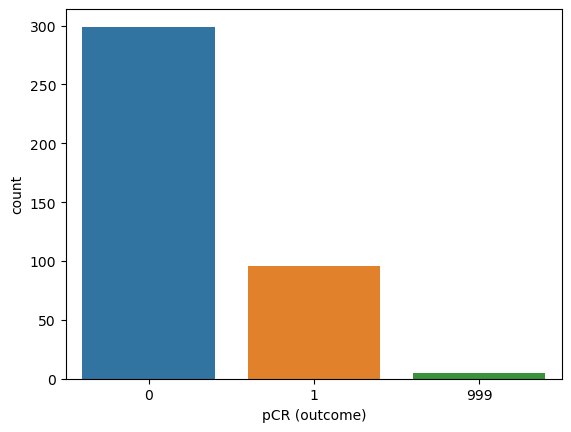

In [8]:
# Bar Chart for pCR (outcome)
sns.countplot(x="pCR (outcome)", data=bc_df)

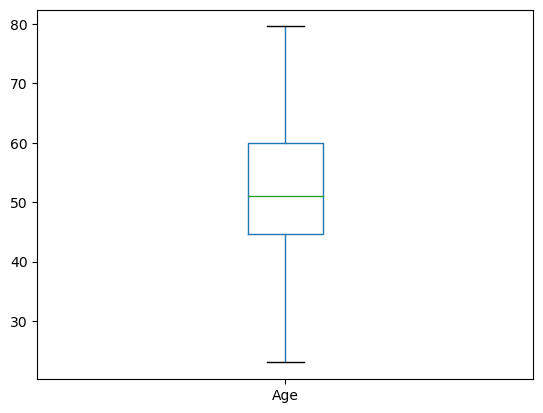

In [9]:
# Age Feature Variable
bc_df['Age'].plot(kind='box')

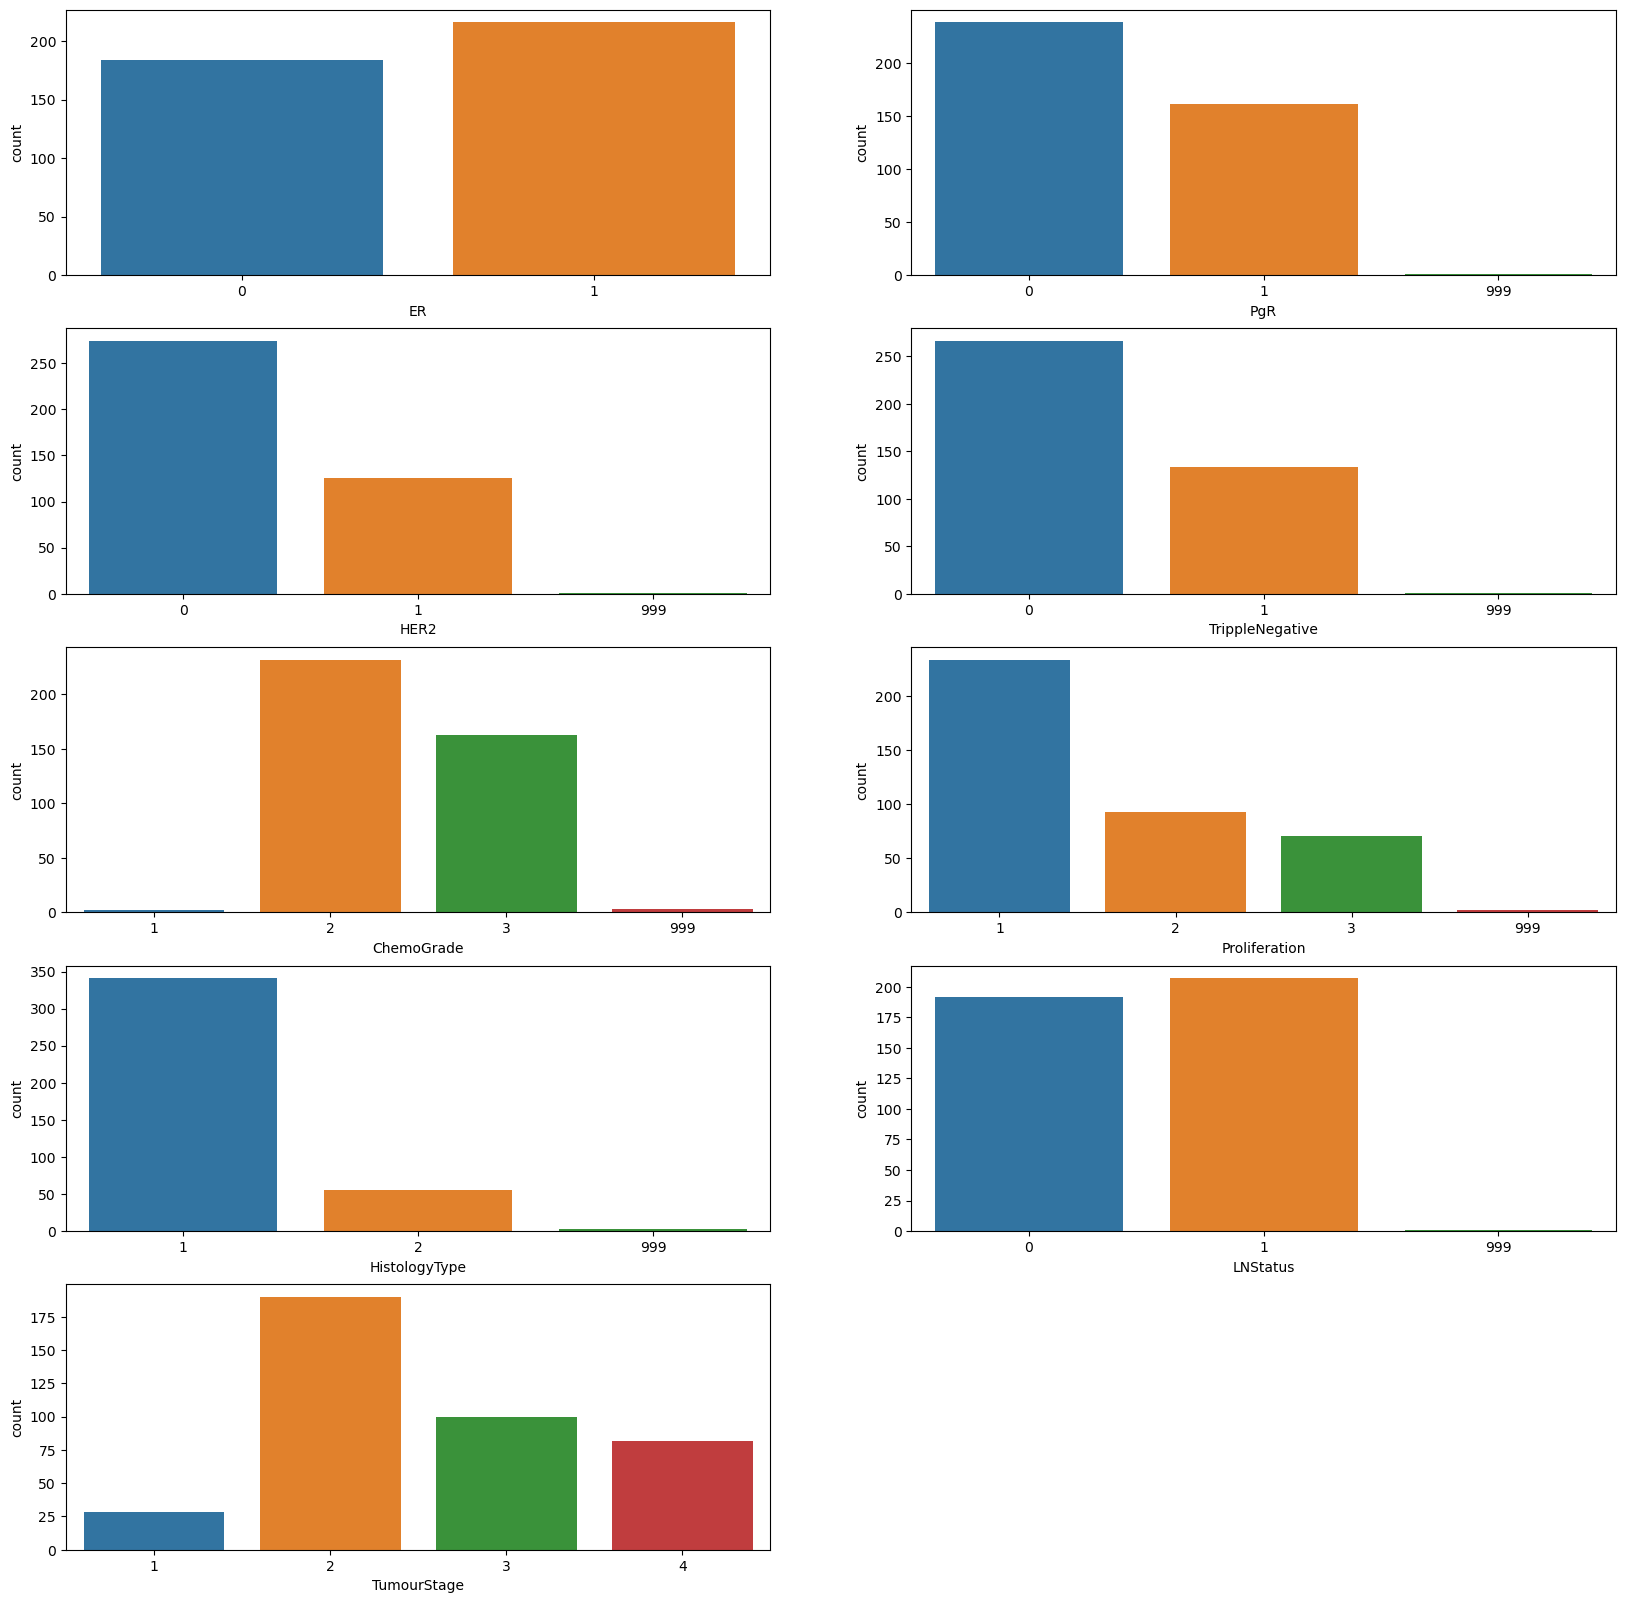

In [10]:
# Clinical Features Bar Chart
clinical = bc_df[['ER','PgR','HER2','TrippleNegative','ChemoGrade','Proliferation','HistologyType','LNStatus','TumourStage']]

f = plt.figure(figsize=[20,20])

for i, col in enumerate(clinical.columns):
    f.add_subplot(5, 2, i+1)
    sns.countplot(x=col, data=bc_df)

plt.show()

original_shape_Elongation                    AxesSubplot(0.125,0.850611;0.133621x0.0293893)
original_shape_Flatness                   AxesSubplot(0.285345,0.850611;0.133621x0.0293893)
original_shape_LeastAxisLength             AxesSubplot(0.44569,0.850611;0.133621x0.0293893)
original_shape_MajorAxisLength            AxesSubplot(0.606034,0.850611;0.133621x0.0293893)
original_shape_Maximum2DDiameterColumn    AxesSubplot(0.766379,0.850611;0.133621x0.0293893)
                                                                ...                        
original_glszm_ZoneVariance               AxesSubplot(0.285345,0.145267;0.133621x0.0293893)
original_ngtdm_Busyness                    AxesSubplot(0.44569,0.145267;0.133621x0.0293893)
original_ngtdm_Coarseness                 AxesSubplot(0.606034,0.145267;0.133621x0.0293893)
original_ngtdm_Complexity                 AxesSubplot(0.766379,0.145267;0.133621x0.0293893)
original_ngtdm_Contrast                          AxesSubplot(0.125,0.11;0.133621

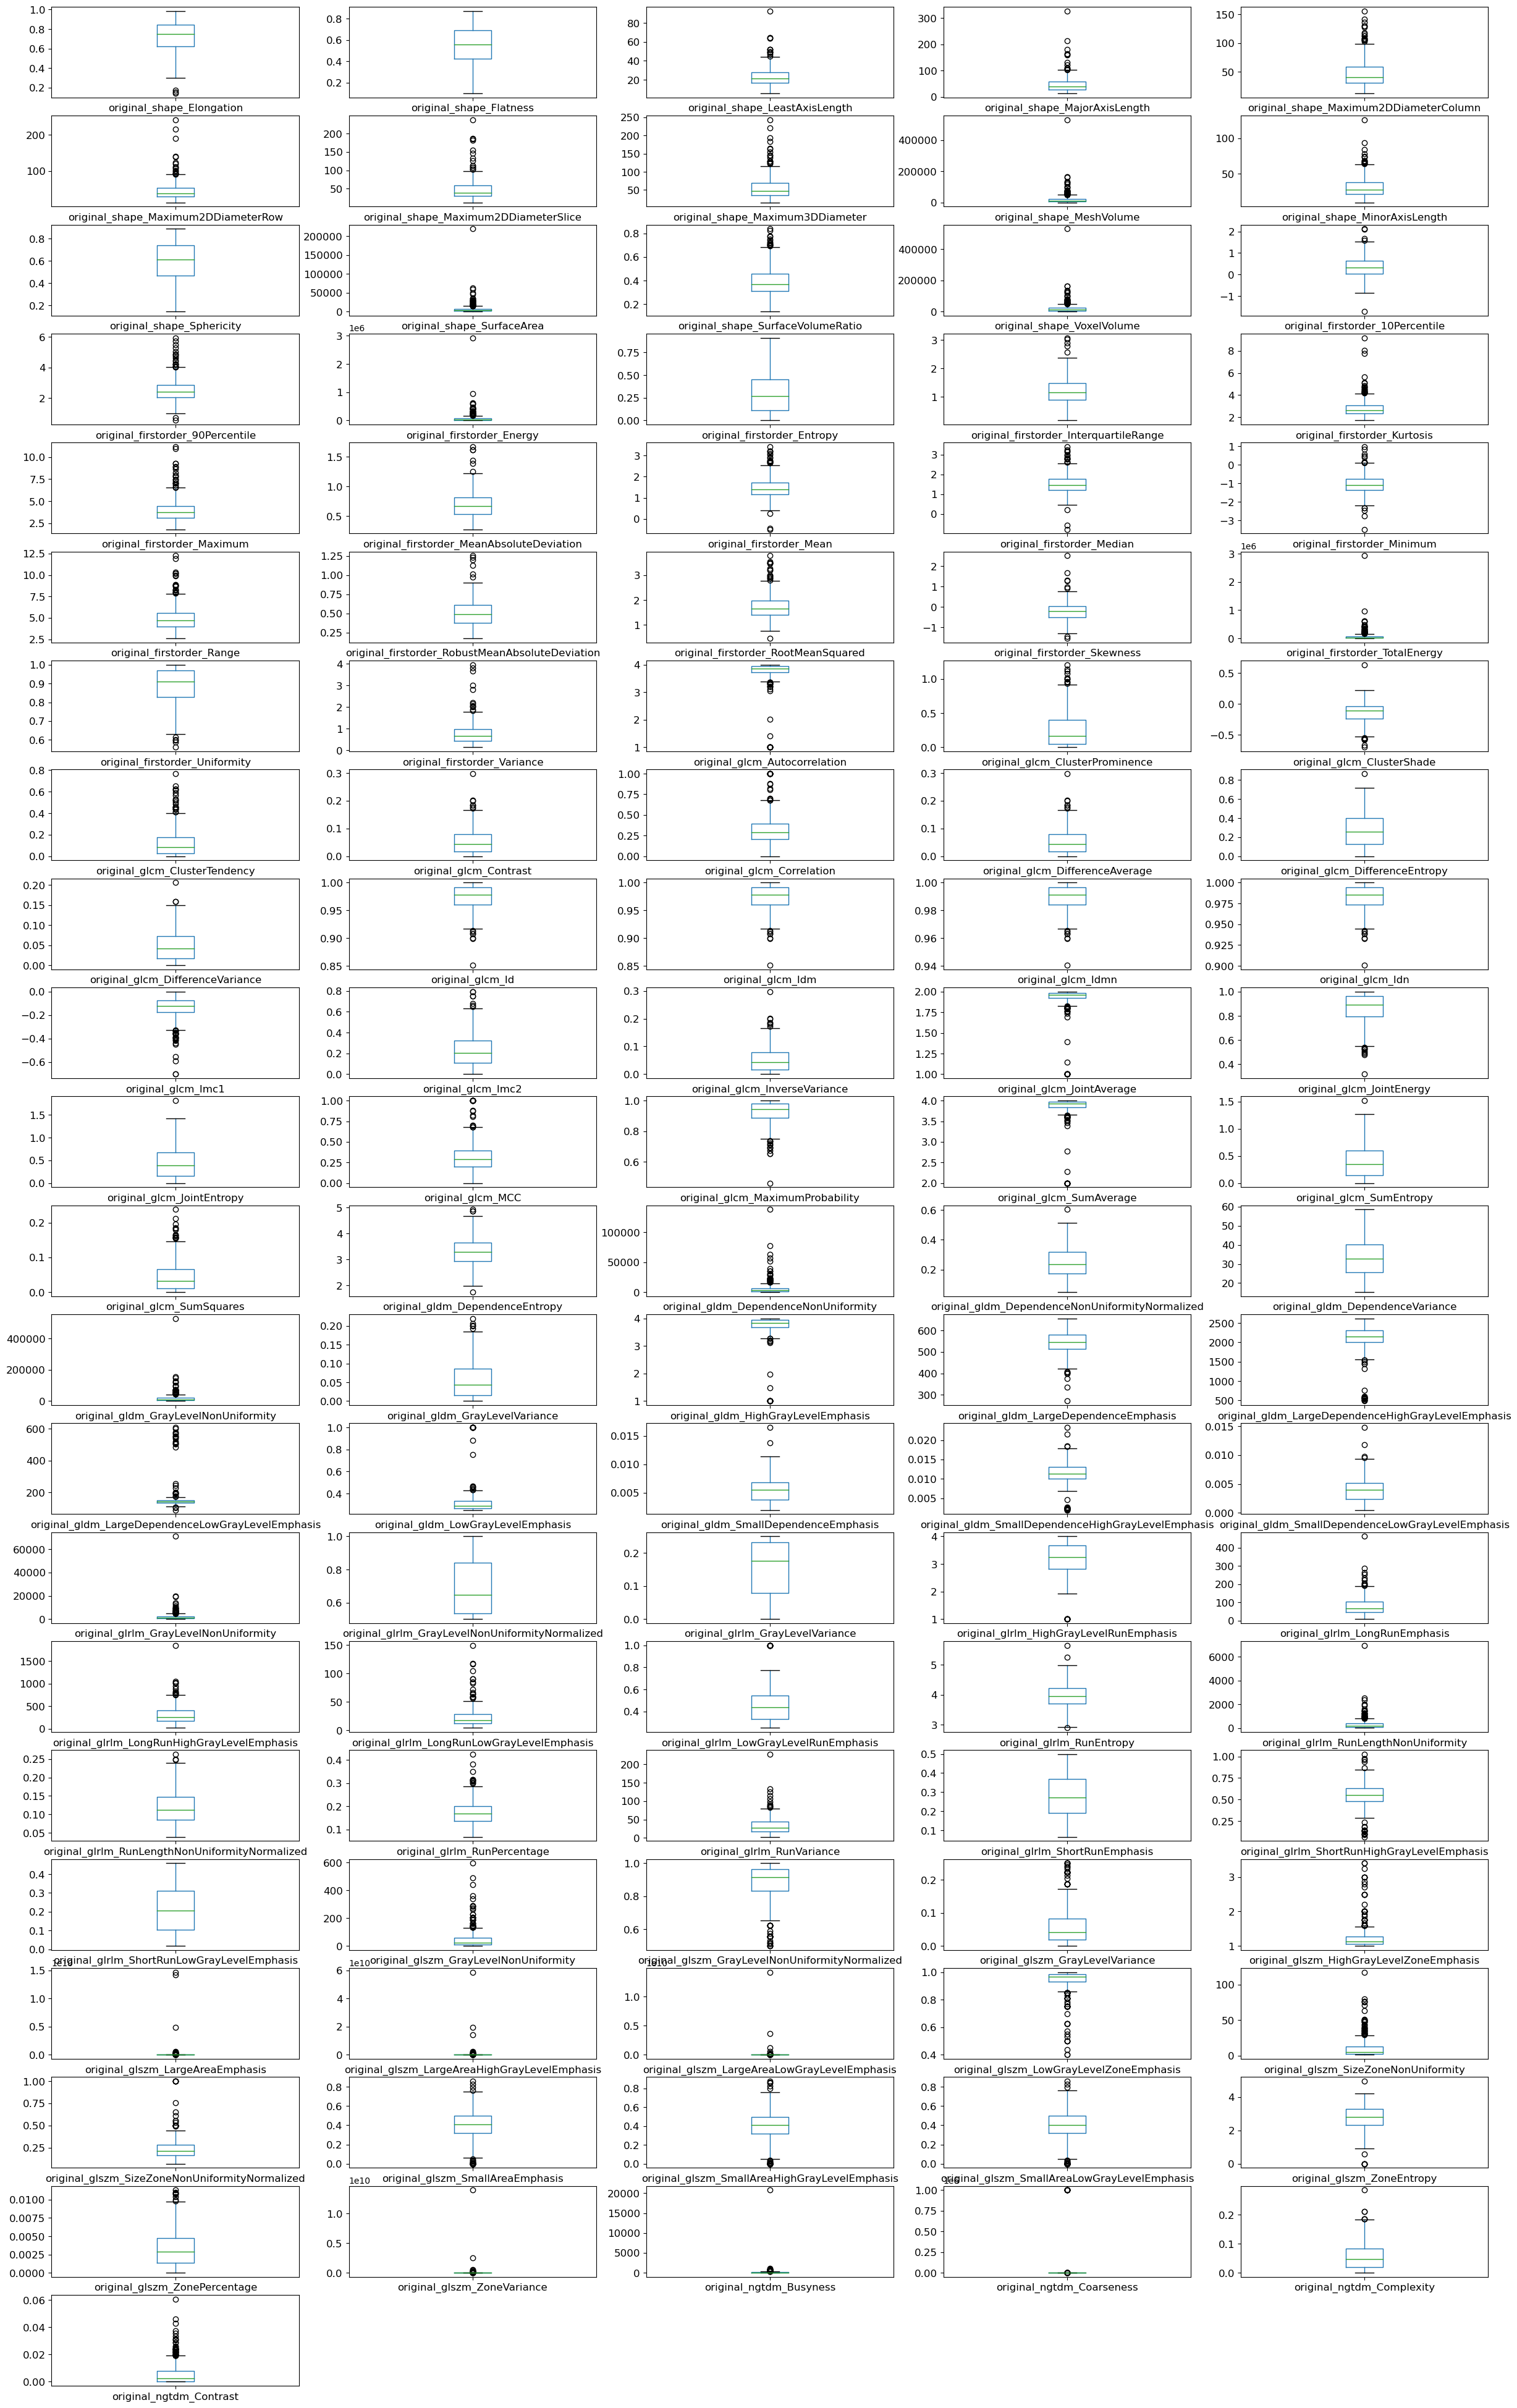

In [11]:
# Boxplot for Image Based Features
image = bc_df.iloc[:,13:119]
image.plot(kind='box', subplots=True, layout=(22,5), sharex=False,
sharey=False, fontsize=12, figsize=(30,50))